In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 


# Import Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')

# We are using whitegrid style for our seaborn plots. This is like the most basic one
sns.set_style(style = 'whitegrid')

# below comments are part of kaggle. uncomment the code in kaggle.
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# import os
# print(os.listdir("../input"))
# Any results you write to the current directory are saved as output.

In [2]:
pd.options.display.max_rows = 15
pd.options.display.float_format = '{:,.2f}'.format
train = pd.read_csv("C:/Users/narendrakumar.h/Documents/train.csv")
test = pd.read_csv("C:/Users/narendrakumar.h/Documents/test.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [3]:
test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
330,1222,2,"Davies, Mrs. John Morgan (Elizabeth Agnes Mary...",female,48.00,0,2,C.A. 33112,36.75,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.00,0,0,7538,9.22,NaN,S
49,941,3,"Coutts, Mrs. William (Winnie Minnie"" Treanor)""",female,36.00,0,2,C.A. 37671,15.90,NaN,S
254,1146,3,"Wenzel, Mr. Linhart",male,32.50,0,0,345775,9.50,NaN,S
106,998,3,"Buckley, Mr. Daniel",male,21.00,0,0,330920,7.82,NaN,Q


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [5]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.00,418.00,332.00,418.00,418.00,417.00
mean,"1,100.50",2.27,30.27,0.45,0.39,35.63
std,120.81,0.84,14.18,0.90,0.98,55.91
min,892.00,1.00,0.17,0.00,0.00,0.00
25%,996.25,1.00,21.00,0.00,0.00,7.90
50%,"1,100.50",3.00,27.00,0.00,0.00,14.45
75%,"1,204.75",3.00,39.00,1.00,0.00,31.50
max,"1,309.00",3.00,76.00,8.00,9.00,512.33


train data includes target variable / dependent variable (passenger survival status) along with other independent variables.

test data does not include passenger survival status. We will predict the output based on machine learning algorithms.

The features of the dataframe consists of different type of variables. let us understand them.

Categorical data:

    Nominal - Cabin and Embarked
    Ordinal - Pclass
    dichotomous - Sex
    
Numeric:

    Discrete - PassengerId, SibSp, Parch, Survived
    Continous - Age, Fare
    
Text (Object):

    Name, Ticket

let us drop below features from both test and train data as these features do not provide any bigger insights.

PassengerId, Name, Ticket

In [6]:
train.drop(['PassengerId'],axis=1,inplace=True)
train.drop(['Name'],axis=1,inplace=True)
train.drop(['Ticket'],axis=1,inplace=True)

test.drop(['PassengerId'],axis=1,inplace=True)
test.drop(['Name'],axis=1,inplace=True)
test.drop(['Ticket'],axis=1,inplace=True)

train.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
267,1,3,male,25.00,1,0,7.78,NaN,S
334,1,1,female,nan,1,0,133.65,NaN,S
698,0,1,male,49.00,1,1,110.88,C68,C
667,0,3,male,nan,0,0,7.78,NaN,S
784,0,3,male,25.00,0,0,7.05,NaN,S


In [7]:
train_data_stats = pd.DataFrame(columns=['column_name','values','values_count_incna',
                                   'values_count_nona','miss_num','miss_pct'])
tmp = pd.DataFrame()

for c in train.columns:
    tmp['column_name'] = [c]
    tmp['values'] = [train[c].unique()]
    tmp['values_count_incna'] = len(train[c].unique())
    tmp['values_count_nona'] = (train[c].nunique())
    tmp['miss_num'] = train[c].isnull().sum()
    tmp['miss_pct'] = (train[c].isnull().sum() / len(train)) *100
    train_data_stats = train_data_stats.append(tmp)
train_data_stats.sort_values(by = 'values_count_incna',ascending=False,inplace=True)
train_data_stats

,column_name,values,values_count_incna,values_count_nona,miss_num,miss_pct
0,Fare,"[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51....",248,248,0,0.00
0,Cabin,"[nan, C85, C123, E46, G6, C103, D56, A6, C23 C...",148,147,687,77.10
0,Age,"[22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0,...",89,88,177,19.87
0,SibSp,"[1, 0, 3, 4, 2, 5, 8]",7,7,0,0.00
0,Parch,"[0, 1, 2, 5, 3, 4, 6]",7,7,0,0.00
0,Embarked,"[S, C, Q, nan]",4,3,2,0.22
0,Pclass,"[3, 1, 2]",3,3,0,0.00
0,Survived,"[0, 1]",2,2,0,0.00
0,Sex,"[male, female]",2,2,0,0.00


In [8]:
test_data_stats = pd.DataFrame(columns=['column_name','values','values_count_incna',
                                   'values_count_nona','miss_num','miss_pct'])
tmp = pd.DataFrame()

for c in test.columns:
    tmp['column_name'] = [c]
    tmp['values'] = [test[c].unique()]
    tmp['values_count_incna'] = len(test[c].unique())
    tmp['values_count_nona'] = (test[c].nunique())
    tmp['miss_num'] = test[c].isnull().sum()
    tmp['miss_pct'] = (test[c].isnull().sum() / len(test)) *100
    test_data_stats = test_data_stats.append(tmp)
test_data_stats.sort_values(by = 'values_count_incna',ascending=False,inplace=True)
test_data_stats

,column_name,values,values_count_incna,values_count_nona,miss_num,miss_pct
0,Fare,"[7.8292, 7.0, 9.6875, 8.6625, 12.2875, 9.225, ...",170,169,1,0.24
0,Age,"[34.5, 47.0, 62.0, 27.0, 22.0, 14.0, 30.0, 26....",80,79,86,20.57
0,Cabin,"[nan, B45, E31, B57 B59 B63 B66, B36, A21, C78...",77,76,327,78.23
0,Parch,"[0, 1, 3, 2, 4, 6, 5, 9]",8,8,0,0.00
0,SibSp,"[0, 1, 2, 3, 4, 5, 8]",7,7,0,0.00
0,Pclass,"[3, 2, 1]",3,3,0,0.00
0,Embarked,"[Q, S, C]",3,3,0,0.00
0,Sex,"[male, female]",2,2,0,0.00


In [9]:
train_data_stats.sort_values(by = 'miss_pct',ascending=False)

,column_name,values,values_count_incna,values_count_nona,miss_num,miss_pct
0,Cabin,"[nan, C85, C123, E46, G6, C103, D56, A6, C23 C...",148,147,687,77.10
0,Age,"[22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0,...",89,88,177,19.87
0,Embarked,"[S, C, Q, nan]",4,3,2,0.22
0,Fare,"[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51....",248,248,0,0.00
0,SibSp,"[1, 0, 3, 4, 2, 5, 8]",7,7,0,0.00
0,Parch,"[0, 1, 2, 5, 3, 4, 6]",7,7,0,0.00
0,Pclass,"[3, 1, 2]",3,3,0,0.00
0,Survived,"[0, 1]",2,2,0,0.00
0,Sex,"[male, female]",2,2,0,0.00


In [10]:
# set the index to Column Names
train_data_stats.set_index('column_name',inplace = True)
train_data_stats

,values,values_count_incna,values_count_nona,miss_num,miss_pct
column_name,,,,,
Fare,"[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51....",248,248,0,0.00
Cabin,"[nan, C85, C123, E46, G6, C103, D56, A6, C23 C...",148,147,687,77.10
Age,"[22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0,...",89,88,177,19.87
SibSp,"[1, 0, 3, 4, 2, 5, 8]",7,7,0,0.00
Parch,"[0, 1, 2, 5, 3, 4, 6]",7,7,0,0.00
Embarked,"[S, C, Q, nan]",4,3,2,0.22
Pclass,"[3, 1, 2]",3,3,0,0.00
Survived,"[0, 1]",2,2,0,0.00
Sex,"[male, female]",2,2,0,0.00


Dealing with missing values:

There are 3 features (Cabin, Age, Embarked) where we have missing values. Let us fill them one by one.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000237833FAB38>]],
      dtype=object)

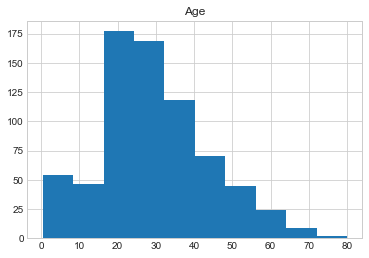

In [11]:
train.hist(column = 'Age')

**Cabin**

77.1% of cabin data is missing in train dataset and 78.23% of cabin data is missing in test dataset.
We can either eliminate this feature from the analysis as most of the data is missing or we can fill the empty cells with 'N' and do the analysis

**Age**

Age is continous numeric data and it can be filled with mean, median or mode.

**Embarked**

Since threr are only 2 missing values. In this case we can fill the missing values by mode.


In [12]:
missing_values = train.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]
percent = (missing_values/len(train)*100)
pd.concat([missing_values,percent],axis=1,keys=['missing_values','percent'])

,missing_values,percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22


In [13]:
test_missing_values = test.isnull().sum().sort_values(ascending = False)
test_missing_values = test_missing_values[test_missing_values > 0]
pct = (test_missing_values / len(test) *100)
pd.concat([test_missing_values,pct],axis=1,keys=['missing_values','percent'])

,missing_values,percent
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24


In [14]:
train.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [15]:
#since 77% of data is missing in cabin feature. we can drop the column . But let us fill the missing data with 'N'
# train.drop(['Cabin'],axis=1,inplace=True)
train.Cabin.fillna('N',inplace=True)
# missing values in Age can be filled with mean.
train.Age.fillna(train.Age.mean(),inplace=True)
# since embarked has only 0.22% missing data. we can replace the missing value by mode
train.Embarked.fillna(train.Embarked.mode()[0],inplace=True)

In [16]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

Similarly test dataset also has missing values. Cabin and Age have almost same amount of data missing.
Therefore, fill the missing data of cabin with 'N' and Age with its mean value.
Fill the missing Fare data with its mean value.

In [17]:
test.Cabin.fillna('N',inplace = True)
test.Age.fillna(test.Age.mean(), inplace = True)
test.Fare.fillna(test.Fare.mean(), inplace = True)
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

Cabin has values B36, E46 and so on. The numeric part of the value can be eliminated and only the first character can be retained. This will provide a meaningful insight.

In [18]:
train['Cabin'] = [x[0] for x in train.Cabin]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.00,1,0,7.25,N,S
1,1,1,female,38.00,1,0,71.28,C,C
2,1,3,female,26.00,0,0,7.92,N,S
3,1,1,female,35.00,1,0,53.10,C,S
4,0,3,male,35.00,0,0,8.05,N,S


In [19]:
test['Cabin'] = [x[0] for x in test.Cabin]
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.50,0,0,7.83,N,Q
1,3,female,47.00,1,0,7.00,N,S
2,2,male,62.00,0,0,9.69,N,Q
3,3,male,27.00,0,0,8.66,N,S
4,3,female,22.00,1,1,12.29,N,S


**Encoding Categorical Data**

Label Encoding :

    substring(Cabin,0,1)
    Pclass(no need in this case since the data is already numeric and ordinal)
    
OneHotEncoding for craeting dummy variable:

    Embarked
    Sex

In [30]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
Label_Encoder_temp = LabelEncoder()
train.loc[:,'Cabin'] = Label_Encoder_temp.fit_transform(train.loc[:,'Cabin'])
test.Cabin = Label_Encoder_temp.fit_transform(test.Cabin)

We have seen two methods to implement one-hot encoding using scikit learn.

The first involved a two step process by first converting Embarked feature into a numerical label using the label encoder class. With numerical labels, we then utilize the one-hot encoder class.

The second method involves a one shot process to implement one-hot encoding in a single step using the label binarizer class. We can also go backwards from the one-hot encoded representation into the original text form

First initialize the OneHotEncoder class to transform the Embarked feature. The fit_transform method expects a 2D array, reshape to transform from 1D to a 2D array.

The fit_transform method returns a sparse array. Use the toarray() method to return a numpy array and assign this to variable X which has our one hot encoded results.

In [31]:
train.Embarked = Label_Encoder_temp.fit_transform(train.Embarked)
embarked_one_hot_encoder = OneHotEncoder()
e = embarked_one_hot_encoder.fit_transform(train.Embarked.values.reshape(-1,1)).toarray()
e

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [32]:
test.Embarked = Label_Encoder_temp.fit_transform(test.Embarked)
e_test = embarked_one_hot_encoder.fit_transform(test.Embarked.values.reshape(-1,1)).toarray()
e_test

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

To add this array back into the original dataframe you could do as below.

In [46]:
dfOneHot = pd.DataFrame(e, columns = ["Embarked"+str(int(i)) for i in range(e.shape[1])])
train_x = pd.concat([train, dfOneHot.iloc[:,:-1]], axis=1)
train_x.drop(columns=['Embarked'],inplace=True)
train_x.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked0,Embarked1
0,0,3,male,22.00,1,0,7.25,7,0.00,0.00
1,1,1,female,38.00,1,0,71.28,2,1.00,0.00
2,1,3,female,26.00,0,0,7.92,7,0.00,0.00
3,1,1,female,35.00,1,0,53.10,2,0.00,0.00
4,0,3,male,35.00,0,0,8.05,7,0.00,0.00


In [47]:
dfOneHot_test = pd.DataFrame(e_test, columns = ['Embarked'+str(int(i)) for i in range(e_test.shape[1])])
test_x = pd.concat([test, dfOneHot_test.iloc[:,:-1]], axis=1)
test_x.drop(columns=['Embarked'],inplace = True)
test_x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked0,Embarked1
0,3,male,34.50,0,0,7.83,7,0.00,1.00
1,3,female,47.00,1,0,7.00,7,0.00,0.00
2,2,male,62.00,0,0,9.69,7,0.00,1.00
3,3,male,27.00,0,0,8.66,7,0.00,0.00
4,3,female,22.00,1,1,12.29,7,0.00,0.00


Avoiding dummy variable trap:
It’s helpful to think of each dummy variable as a yes/ no question about group membership.
In the above example the 3 city(Embarked) groups are:

0 = S
1 = C
2 = Q

Dummy variable 0 answers the question: Do you identify yourself as S? 0 = no, 1 = yes.

Dummy variable 1 answers the question: Do you identify yourself as C? 0 = no, 1 = yes.

Provided that your groups are mutually exclusive and exhaustive, then if a person answers no to the first two questions, that person must be a member of group 3, other city.

In general, for k groups, you use only (k-1) dummy variables.

In fact, if you try to include a third dummy variable in this situation, regression analysis will fail because the scores on the third dummy variable are perfectly predictable from the answers on the first two dummy variable questions.

That is why in the above example, I have include only 2 Embarked dummy variables.

If you have a sex dummy for example, you can include one for men, in which case the coefficient for women will be included in the constant term. Or you could have one for women. But you can’t have one for men and one for women.
Therefore LabelEnocding is sufficient for Sex feature.

In [50]:
train_x.Sex = Label_Encoder_temp.fit_transform(train_x.Sex)
train_x.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked0,Embarked1
811,0,3,1,39.00,0,0,24.15,7,0.00,0.00
391,1,3,1,21.00,0,0,7.80,7,0.00,0.00
724,1,1,1,27.00,1,0,53.10,4,0.00,0.00
792,0,3,0,29.70,8,2,69.55,7,0.00,0.00
145,0,2,1,19.00,1,1,36.75,7,0.00,0.00


In [51]:
test_x.loc[:,'Sex'] = Label_Encoder_temp.fit_transform(test_x.loc[:,'Sex'])
test_x.sample(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked0,Embarked1
290,1,1,30.27,0,0,39.60,7,0.00,0.00
114,1,0,63.00,1,0,221.78,2,0.00,0.00
388,3,1,21.00,0,0,7.75,7,0.00,1.00
402,1,0,22.00,0,1,59.40,7,1.00,0.00
174,3,1,40.00,1,5,31.39,7,0.00,0.00


The end result is shown above. We added back the one hot encoded values of Embarked into our original data frame for inspection. We now have 2 new dummy features for Embarked and 1 dummy variable for Sex. We could use these as inputs into our machine learning models.

Seperate the input (x) and output (y) train dataset.

In [60]:
train_y = train_x.loc[:,'Survived']
train_x.drop(columns=['Survived'],inplace = True)
train_x.sample(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked0,Embarked1
639,3,1,29.70,1,0,16.10,7,0.00,0.00
60,3,1,22.00,0,0,7.23,7,1.00,0.00
415,3,0,29.70,0,0,8.05,7,0.00,0.00
139,1,1,24.00,0,0,79.20,1,1.00,0.00
113,3,0,20.00,1,0,9.82,7,0.00,0.00


**Feature Scaling**

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.fit_transform(test_x)

In [69]:
train_x

array([[ 0.82737724,  0.73769513, -0.5924806 , ...,  0.51129323,
        -0.48204268, -0.30756234],
       [-1.56610693, -1.35557354,  0.63878901, ..., -1.91449093,
         2.0745051 , -0.30756234],
       [ 0.82737724, -1.35557354, -0.2846632 , ...,  0.51129323,
        -0.48204268, -0.30756234],
       ...,
       [ 0.82737724, -1.35557354,  0.        , ...,  0.51129323,
        -0.48204268, -0.30756234],
       [-1.56610693,  0.73769513, -0.2846632 , ..., -1.91449093,
         2.0745051 , -0.30756234],
       [ 0.82737724,  0.73769513,  0.17706291, ...,  0.51129323,
        -0.48204268,  3.25137334]])

In [70]:
test_x

array([[ 0.87348191,  0.75592895,  0.3349926 , ...,  0.50045645,
        -0.56814154,  2.84375747],
       [ 0.87348191, -1.32287566,  1.32553003, ...,  0.50045645,
        -0.56814154, -0.35164743],
       [-0.31581919,  0.75592895,  2.51417495, ...,  0.50045645,
        -0.56814154,  2.84375747],
       ...,
       [ 0.87348191,  0.75592895,  0.65196458, ...,  0.50045645,
        -0.56814154, -0.35164743],
       [ 0.87348191,  0.75592895,  0.        , ...,  0.50045645,
        -0.56814154, -0.35164743],
       [ 0.87348191,  0.75592895,  0.        , ...,  0.50045645,
         1.76012477, -0.35164743]])

Fitting the linear regression to training data

In [111]:
from sklearn import linear_model
logistic_regressor = linear_model.LogisticRegression()
logistic_regressor.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

predicting the test results

In [113]:
y_pred = logistic_regressor.predict(test_x)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,